**Juan Camilo Serrano Correa**

In [23]:
 # Espacio para importar las librerías necesarias
# Sistema
import sys
import os

#DataScience
import pandas as pd

#Numerico
import numpy as np

#Graficas
import matplotlib.pyplot as plt
import seaborn as sns #estilos cheveres para plt

#ML
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.models import model_from_json
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
#from tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
import sklearn
from sklearn.model_selection import train_test_split
#Extra
from sklearn.datasets import load_iris #Dataset Iris

###Preprocessing Data

In [24]:
#Importar el dataset desde SKlearn
iris = load_iris()
#cargar el dataset en un dataframe (df) .>pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.astype(float)#Convertir o asegurar que los datos tengan formato float
df["target"] = iris.target #importar los target (que estaban seprados)
df["target"] = df.target.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
#one hot encoding
#Permite que (a veces sea requierdo)
#Se puedan emparejar features con mas de una categoria
target = pd.get_dummies(df["target"],prefix="label")#transformacion
df = pd.concat([df,target],axis=1)#Concatenar tablas axis =1(columnas)
df.drop(["target"], axis="columns", inplace =True)#Eliminar target anguo


In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [27]:
#Seperar feature de target
#features -> x, target -> y

X = df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
X = np.asarray(X)
y = df[["label_setosa","label_versicolor","label_virginica"]]
y = np.asarray(y)


In [28]:
#Splitting (separar training de validation)(train 80, val=20)
X_train, X_validation, y_train, y_validation = train_test_split(X,y,train_size=0.8) 
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


###Construyendo un Red Neuronal

In [29]:
#Funcion para crear ANN
def create_model():
  model = Sequential([
                      Dense(64, activation="relu", input_shape=(4,)),
                      Dense(128, activation="relu"),
                      Dense(128, activation="relu"),
                      Dense(128, activation="relu"),
                      Dense(64, activation="relu"),
                      Dense(64, activation="relu"),
                      Dense(64, activation="relu"),
                      Dense(3, activation="softmax"),#retorna valores entre 0 y 1
  ])
  return model

In [30]:
#Instanciar ANN y verificar arquitectura 
model = create_model()
model.summary()
#64 neuronas X 4 features = 256 + 64datos bayas

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)               

In [31]:
#compilar nuestra red neuronal
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])   
#categorical_crossentropy = Para clasificacion
#mse rmse ...= Para regresion

In [32]:
#Fitting
history = model.fit(X_train, y_train, epochs=800, validation_split=0.20, batch_size=40, verbose=2)#, callbacks=[early_stopping])  
#batch_size = dividr proceso en subgrupos
#Verbose = [0 = No muestra nada],[1 = Solo errores],[2 = Muestra todo]


Epoch 1/800
3/3 - 1s - loss: 1.1025 - accuracy: 0.5312 - val_loss: 1.0659 - val_accuracy: 0.6250
Epoch 2/800
3/3 - 0s - loss: 1.0410 - accuracy: 0.6875 - val_loss: 0.9986 - val_accuracy: 0.6250
Epoch 3/800
3/3 - 0s - loss: 0.9672 - accuracy: 0.6875 - val_loss: 0.9185 - val_accuracy: 0.6250
Epoch 4/800
3/3 - 0s - loss: 0.8793 - accuracy: 0.6875 - val_loss: 0.8057 - val_accuracy: 0.6250
Epoch 5/800
3/3 - 0s - loss: 0.7559 - accuracy: 0.6875 - val_loss: 0.6678 - val_accuracy: 0.6250
Epoch 6/800
3/3 - 0s - loss: 0.6099 - accuracy: 0.7396 - val_loss: 0.5155 - val_accuracy: 0.8750
Epoch 7/800
3/3 - 0s - loss: 0.4666 - accuracy: 0.8750 - val_loss: 0.3991 - val_accuracy: 0.8750
Epoch 8/800
3/3 - 0s - loss: 0.3559 - accuracy: 0.8646 - val_loss: 0.3281 - val_accuracy: 0.8750
Epoch 9/800
3/3 - 0s - loss: 0.3225 - accuracy: 0.8542 - val_loss: 0.2875 - val_accuracy: 0.8750
Epoch 10/800
3/3 - 0s - loss: 0.2561 - accuracy: 0.8958 - val_loss: 0.2270 - val_accuracy: 0.8750
Epoch 11/800
3/3 - 0s - loss:

In [33]:
#Funcion para hacer un grafico de evaluacion de poceso de entrenamiento ANN
def grafico_metricas(history, metric):
  train_metrics = history.history[metric]
  val_metrics = history.history['val_'+metric]
  epochs = range(1, len(train_metrics)+1)
  plt.plot(epochs, train_metrics)
  plt.plot(epochs, val_metrics)
  plt.title("Entrenamiento y Validacion"+metric)
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(["train_"+metric,"val"+metric])
  plt.show()


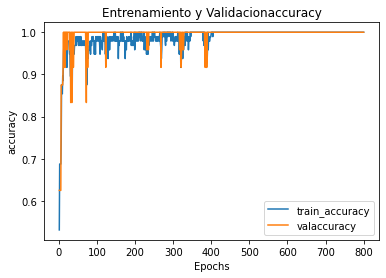

In [34]:
grafico_metricas(history, "accuracy")
#Seguro tenemos overfiting

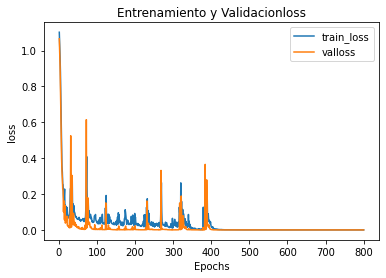

In [35]:
grafico_metricas(history,"loss")

In [36]:
#Caso de regularizacion L2 -> SGD/GD(Gradient Descent), adam
#caso de regularizacion con Droput
#Estamos haciendo una nueva ANN pero con capas de Droput(Capas asesinas)

#from tensorflow.keras.regularizers import l2
#from tensorflow.keras.layers import Dropout

def model_regularized(factor, tasa):
  model=Sequential([
                    Dense(64, activation="relu", input_shape=(4,), kernel_regularizer=l2(factor)),
                    Dropout(tasa), 
                    Dense(128, activation="relu", kernel_regularizer=l2(factor)),
                    Dropout(tasa),
                    Dense(128, activation="relu", kernel_regularizer=l2(factor)),
                    Dropout(tasa),
                    Dense(128, activation="relu", kernel_regularizer=l2(factor)),
                    Dropout(tasa),
                    Dense(64, activation="relu",  kernel_regularizer=l2(factor)),
                    Dropout(tasa),
                    Dense(64, activation="relu", kernel_regularizer=l2(factor)),
                    Dropout(tasa),
                    Dense(64, activation="relu",  kernel_regularizer=l2(factor)),
                    Dropout(tasa),
                    Dense(3, activation="softmax"),
  ])
  return model

In [37]:
#instancir nueva ANN
model = model_regularized(1e-4, 0.60)#factor l2, tada de dropout
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

In [38]:
#Compilar nuestranueva ANN con regularizadores
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
#proceso de entrenamiento
history = model.fit(X_train, y_train, epochs=800, validation_split=0.20, batch_size=40, verbose=2)#, callbacks=[early_stopping])  

Epoch 1/800
3/3 - 1s - loss: 2.8361 - accuracy: 0.3229 - val_loss: 1.1471 - val_accuracy: 0.6250
Epoch 2/800
3/3 - 0s - loss: 1.9745 - accuracy: 0.3958 - val_loss: 1.1497 - val_accuracy: 0.6250
Epoch 3/800
3/3 - 0s - loss: 1.9137 - accuracy: 0.3125 - val_loss: 1.1527 - val_accuracy: 0.5000
Epoch 4/800
3/3 - 0s - loss: 1.8240 - accuracy: 0.3333 - val_loss: 1.1544 - val_accuracy: 0.2917
Epoch 5/800
3/3 - 0s - loss: 1.5335 - accuracy: 0.3229 - val_loss: 1.1556 - val_accuracy: 0.2917
Epoch 6/800
3/3 - 0s - loss: 1.6034 - accuracy: 0.3333 - val_loss: 1.1550 - val_accuracy: 0.2917
Epoch 7/800
3/3 - 0s - loss: 1.6475 - accuracy: 0.2917 - val_loss: 1.1528 - val_accuracy: 0.2917
Epoch 8/800
3/3 - 0s - loss: 1.3902 - accuracy: 0.3021 - val_loss: 1.1523 - val_accuracy: 0.2917
Epoch 9/800
3/3 - 0s - loss: 1.4302 - accuracy: 0.3646 - val_loss: 1.1520 - val_accuracy: 0.2917
Epoch 10/800
3/3 - 0s - loss: 1.3341 - accuracy: 0.3438 - val_loss: 1.1522 - val_accuracy: 0.2917
Epoch 11/800
3/3 - 0s - loss:

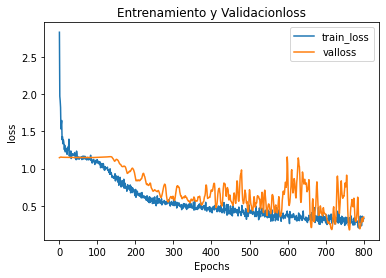

In [40]:
grafico_metricas(history,"loss")
#Tiene que haber mas error en validation que en error

###REGULARIZACION CON EARLY STOPPING

In [41]:
#Red neuronal simplificada 
model2 = create_model()
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])  

In [42]:
#Regularización con Early Stopping
#Detiene ele entrenamiento cuando deja de haber una mejora notoria en el entrenamiento
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor = "val_acurracy",
    patience = 100,
    min_delta = 0.001,
    mode = "max",
    restore_best_weights=True
)


In [43]:
#con early stopping
history = model2.fit(X_train, y_train, epochs=800, validation_split=0.20, batch_size=40, verbose=2, callbacks=[early_stopping])

Epoch 1/800
3/3 - 1s - loss: 1.0795 - accuracy: 0.3229 - val_loss: 1.0416 - val_accuracy: 0.5417
Epoch 2/800
3/3 - 0s - loss: 1.0118 - accuracy: 0.5938 - val_loss: 0.9582 - val_accuracy: 0.6250
Epoch 3/800
3/3 - 0s - loss: 0.9331 - accuracy: 0.6979 - val_loss: 0.8661 - val_accuracy: 0.6250
Epoch 4/800
3/3 - 0s - loss: 0.8431 - accuracy: 0.7292 - val_loss: 0.7650 - val_accuracy: 0.6250
Epoch 5/800
3/3 - 0s - loss: 0.7275 - accuracy: 0.7708 - val_loss: 0.6298 - val_accuracy: 0.9167
Epoch 6/800
3/3 - 0s - loss: 0.5917 - accuracy: 0.8333 - val_loss: 0.5037 - val_accuracy: 0.8750
Epoch 7/800
3/3 - 0s - loss: 0.4683 - accuracy: 0.8854 - val_loss: 0.4061 - val_accuracy: 0.9167
Epoch 8/800
3/3 - 0s - loss: 0.3871 - accuracy: 0.8229 - val_loss: 0.3208 - val_accuracy: 1.0000
Epoch 9/800
3/3 - 0s - loss: 0.3195 - accuracy: 0.9479 - val_loss: 0.2656 - val_accuracy: 0.9583
Epoch 10/800
3/3 - 0s - loss: 0.2731 - accuracy: 0.9062 - val_loss: 0.2498 - val_accuracy: 0.9167
Epoch 11/800
3/3 - 0s - loss: